In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## things to consider:
- cross validation
- scaling, normalizing
- validation data set
- confidence intervals
- resampling
- compute ttests
- find best predictors

In [154]:
df = pd.read_csv("all_data.csv").drop(columns=['Unnamed: 0'])

In [155]:
light_status = []
for i in range(df.shape[0]):
    if df.loc[i,'avg_hrly_light'] == 4095.:
        light_status.append(0)
    else:
        light_status.append(1)


In [157]:
df['light_status'] = light_status

In [158]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [159]:
train_data.columns

Index(['day', 'hour', 'month', 'weekday', 'avg_hrly_hum', 'avg_hrly_temp',
       'avg_hrly_press', 'tot_motion_count', 'avg_hrly_light', 'num_psets_due',
       'light_status'],
      dtype='object')

In [160]:
X_train = train_data.drop(columns=['light_status','avg_hrly_light'])
y_train = train_data['light_status']
X_test = test_data.drop(columns=['light_status', 'avg_hrly_light'])
y_test = test_data['light_status']

In [161]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def standardize(train_df, val_df):
    # builtin standardscaler
    
    # fit on train df
    scaler = StandardScaler(with_mean=True) # with mean=True also centers before scaling
    scaler.fit(train_df)
    
    # transform train
    train_scaled = scaler.transform(train_df)
    scaled_train_df = pd.DataFrame(train_scaled, index=train_df.index, columns=train_df.columns)
    
    # transform val
    val_scaled = scaler.transform(val_df)
    scaled_val_df = pd.DataFrame(val_scaled, index=val_df.index, columns=val_df.columns)
    
    return scaled_train_df, scaled_val_df #, scaled_test_df

In [162]:
X_train_scaled, X_test_scaled = standardize(X_train, X_test)

In [163]:
X_train_scaled

,day,hour,month,weekday,avg_hrly_hum,avg_hrly_temp,avg_hrly_press,tot_motion_count,num_psets_due
11,1.579673,-0.518307,-2.339563,-0.519077,2.079974,1.521010,1.022826,-0.229336,1.027062
718,-1.104911,0.063452,2.059247,-0.519077,-0.541383,-1.222996,-1.682203,-0.472205,1.027062
111,-1.208164,1.226968,-0.140158,1.683178,1.194729,1.886878,0.485793,1.786473,-0.644645
653,1.579673,-1.245505,-0.140158,1.132614,-1.220358,-1.487233,-0.107353,-0.472205,-0.644645
46,1.682926,1.081529,-2.339563,0.031486,2.449542,1.683618,-0.886118,-0.472205,-0.644645
...,...,...,...,...,...,...,...,...,...
302,-0.278885,1.517847,-0.140158,-1.069641,-1.108628,-0.206697,-0.024041,-0.472205,-0.644645
8,1.579673,-0.954625,-2.339563,-0.519077,2.165920,1.277098,0.920436,-0.472205,1.027062
61,-1.414670,-0.227428,-0.140158,0.582050,1.345134,1.439706,-0.555078,0.329262,-0.644645
431,0.443888,-1.681823,-0.140158,-1.069641,-0.923844,-1.101040,0.836674,-0.472205,-0.644645


Linear Regression

In [164]:
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
lin_pred_train = model.predict(X_train)
lin_pred_test = model.predict(X_test)

0.4704062738615715
0.3455900383831365


Ridge Regression

In [165]:
clf = Ridge(alpha=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.4704062733284604
0.3455866368639784


Lasso Regression

In [166]:
# lambdas = [0.01, 0.05, 0.1, 5, 10, 50, 100]
# , alphas=lam, max_iter=100000
# for lam in lambdas:
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.3960430157039009
0.29463072921074984


Can try other models for classifying later ... if want to look at a different problem

Logistic Regression

- could look at misclassification rate for logistic vs linear

In [173]:
logreg = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))
log_pred_train = logreg.predict_proba(X_train)
log_pred_test = logreg.predict_proba(X_test)

0.9199346405228758
0.922077922077922


In [186]:
X_train.shape, X_test.shape

((612, 9), (154, 9))

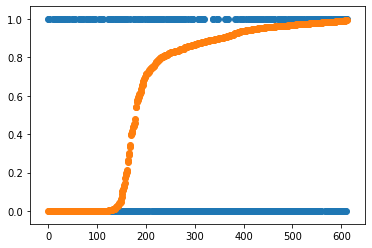

In [183]:
plt.scatter(np.arange(X_train.shape[0]), y_train)
plt.scatter(np.arange(X_train.shape[0]), np.sort(log_pred_train[:,0]))
plt.show()

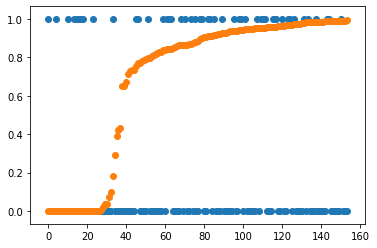

In [189]:
plt.scatter(np.arange(X_test.shape[0]), y_test)
plt.scatter(np.arange(X_test.shape[0]), np.sort(log_pred_test[:,0]))
plt.show()

In [169]:
X_train.shape, y_train.shape

((612, 9), (612,))

AttributeError: 'Series' object has no attribute 'reshape'

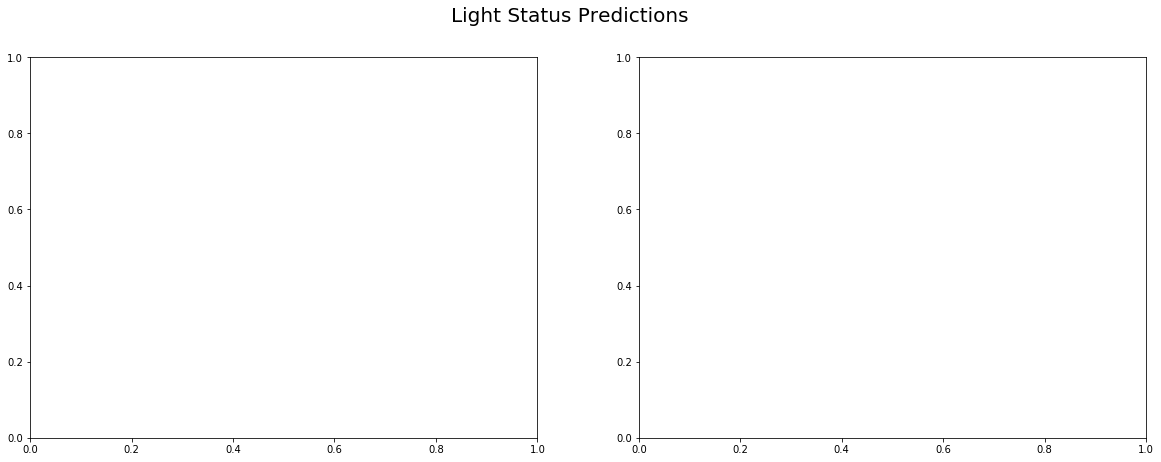

In [152]:
# lin_train_pred = pd.DataFrame({"X": best_predictor_train, "Pred": y_train_pred}).sort_values("Pred")
# lin_test_pred = pd.DataFrame({"X": best_predictor_test, "Pred": y_test_pred}).sort_values("Pred")

fig, axes = plt.subplots(1,2,figsize=(20,7))
fig.suptitle("Light Status Predictions", fontsize=20)
axes.ravel()

# train 
axes[0].scatter(X_train,y_train, label="True Light Status", alpha=0.5)
axes[0].plot(X_train, lin_train_pred, label="linear regression", c="g")
# axes[0].scatter(best_predictor_train, y_train_pred2[:,0], label="logistic regression, class 0", alpha=0.7, c="red")
axes[0].scatter(X_train, log_pred_train, label="logistic regression", alpha=0.7, c="m")
axes[0].plot(best_predictor_train, [0.5]*best_predictor_train.shape[0], label="y=0.5", c="black")
axes[0].legend()
axes[0].set_title("Train Data")
axes[0].set_xlabel("Best Gene Predictor")
axes[0].set_ylabel("Predicted Values")
axes[0].grid(False)

# test
# axes[1].scatter(best_predictor_test,y_test, label="True binary Response", alpha=0.5)
# axes[1].plot(lin_test_pred.X, lin_test_pred.Pred, label="linear regression", c="g")
# # axes[1].scatter(best_predictor_test, y_test_pred2[:,0], label="logistic regression, class 0", alpha=0.7, c="red")
# axes[1].scatter(best_predictor_test, y_test_pred2[:,1], label="logistic regression, class 1", alpha=0.7, c="m")
# axes[1].plot(best_predictor_test, [0.5]*best_predictor_test.shape[0], label="y=0.5", c="black")
# axes[1].legend()
# axes[1].set_title("Test Data")
# axes[1].set_xlabel("Best Gene Predictor")
# axes[1].set_ylabel("Predicted Values")
# axes[1].grid(False)
# plt.show()
# plot predict prob a